# Concordance index

Concordance Index (CI) or c-index is used in a few DREAM challenges and has its owm function within DREAMTools. 

Here below we give a couple of examples based on the reference here below.

It is a useful statistics used in the context of right-censored observations (survival analysis). Right-censored data arises for instance from clinical studies where patients may drop out of the study or the study ends before an event. For each patient or observation, we have therefore two observations: the time and whether or not an event has occured at that time. Right-censored means that we may only have an upper bound on the time of an event rather than an exact time.

Reference: http://sauerwine.blogspot.co.uk/2012/03/concordance-index-and-cox-modeling.html

In [9]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (8,6)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
from dreamtools.core import concordanceIndex
import numpy as np

In [3]:
# Let us create a test set of observations of size N
N = 100
testObservations = np.random.exponential(1, N)

In [4]:
# let us study the effect of the noise and for that we create M
# standard deviations from 0.01 to 10
M = 1000
stds = np.linspace(0.01, 10, M)

In [7]:
# Now, we compute the concordance index
cis = []
for std in stds:
    prediction = abs(testObservations + std * np.random.randn(1,N))[0]
    
    # get concordance assuming that the event occured all the time
    events = [True] * N
    concordance = concordanceIndex(prediction, testObservations, events)
    
    cis.append(concordance)

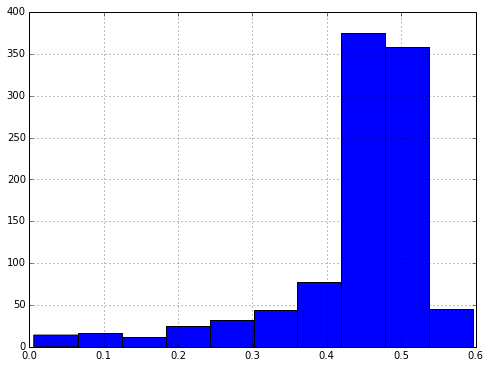

In [10]:
hist(cis)
grid()

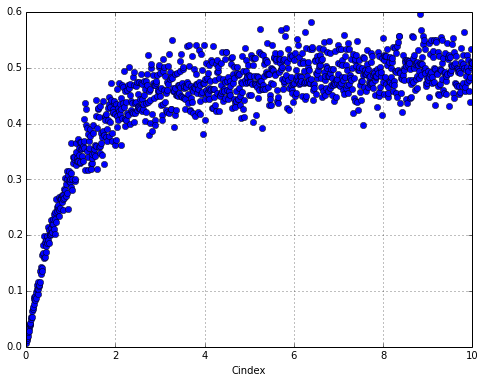

In [11]:
plot(stds, cis, 'o')
grid()
xlabel('Cindex')

Here, we see that concordance index is affected by the noise 
spanning values from 0 (no noise, perfect correlation) 
to 0.5 (random prediction)

If instead of a time, we try to estimate the inverse (rate) then values 
would go from 1 to 0 as shown here below

In [12]:
# Now, we compute the concordance index
cis_inverse = []
for std in stds:
    prediction = abs(testObservations + std * np.random.randn(1,N))[0]
    
    # get concordance assuming that the event occured all the time
    events = [True] * N
    concordance = concordanceIndex(1./prediction, testObservations, events)
    cis_inverse.append(concordance)

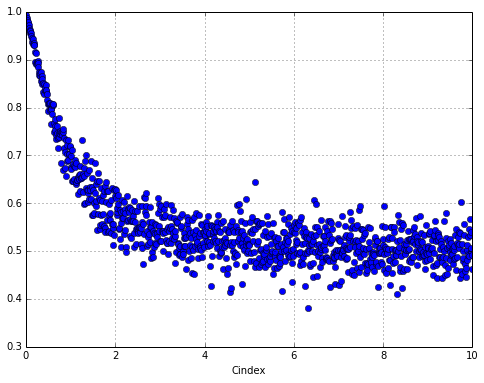

In [16]:
plot(stds, cis_inverse, 'o')
grid()
xlabel('Cindex')

What is important to understand is that when computing the CI values, 
what matters is the order.

Consider 3 events at time 1,2 and 3. A perfect concordance of zero 
is reached intuitively by the same set of observations:

In [18]:
concordanceIndex([1,2,3], [1,2,3], [True, True, True])

0.0

However, a set of predicted values quite different of 0.1, 3 and 3.1 would
also give the same value CI:

In [19]:
concordanceIndex([1,2,3], [0.1,3,3.1], [True, True, True])

0.0

the reason being that the order matters and is the same in both case.